In [ ]:
!pip install pyproj

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 40.2 MB/s eta 0:00:00


In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 55.8 MB/s eta 0:00:00


In [ ]:
!pip uninstall cython
!pip install cython
!pip uninstall cartopy
!pip install cartopy

Found existing installation: Cython 0.29.33
Uninstalling Cython-0.29.33:
  Would remove:
    /usr/local/bin/cygdb
    /usr/local/bin/cython
    /usr/local/bin/cythonize
    /usr/local/lib/python3.9/dist-packages/Cython-0.29.33.dist-info/*
    /usr/local/lib/python3.9/dist-packages/Cython/*
    /usr/local/lib/python3.9/dist-packages/cython.py
    /usr/local/lib/python3.9/dist-packages/pyximport/*
Proceed (Y/n)? y
  Successfully uninstalled Cython-0.29.33
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 40.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 93.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.

In [ ]:
!apt-get -qq install python-cartopy python3-cartopy
!pip uninstall -y shapely   
!pip install shapely --no-binary shapely

E: Unable to locate package python-cartopy
Found existing installation: shapely 2.0.1
Uninstalling shapely-2.0.1:
  Successfully uninstalled shapely-2.0.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.5/275.5 KB 6.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for shapely: filename=shapely-2.0.1-cp39-cp39-linux_x86_64.whl size=979752 sha256=bd2c14114f1641abfc1324d2691f60fef22182ed99903a4211c67defc8b713cb
  Stored in directory: /root/.cache/pip/wheels/c2/f0/2b/e33fb469c9bf8d08688be4df902af6d7c2210128fc7c046889
Successfully built shapely


In [ ]:
import pandas as pd
import pyproj
import math
import matplotlib.pyplot as plt
import seaborn as sb
import urllib.request

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np

import cartopy
import cartopy.crs as ccrs                   # for projections
import cartopy.feature as cfeature           # for features
import cartopy.io.shapereader as shapereader
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.feature.nightshade import Nightshade
import geopandas as gpd
import random
from shapely.geometry import Point, Polygon
import time

In [ ]:
ruta = 'https://raw.githubusercontent.com/fmoreno4/cd-files/main/eventos_dengue_2020.csv'
#ruta = 'https://raw.githubusercontent.com/rasief/cartografia/master/melb_data.csv'
df = pd.read_csv(ruta)
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000


In [ ]:
#Creación de la proyección
P = pyproj.Proj(proj='utm', zone=18, ellps='WGS84', preserve_units=True)

In [ ]:
#Se convertirán las coordenadas geográficas a UTM
df['x'], df['y'] = P(df['longitud'], df['latitud'])
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud,x,y
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501,709584.027559,782579.281866
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400,709262.121378,782963.354103
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003,710847.924654,784163.825097
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958,710863.366771,781635.895608
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980,709314.159319,781570.969374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487,709918.546763,782204.438977
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607,709466.644754,781388.734012
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264,709492.782783,784279.996264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000,710198.574916,780930.648555


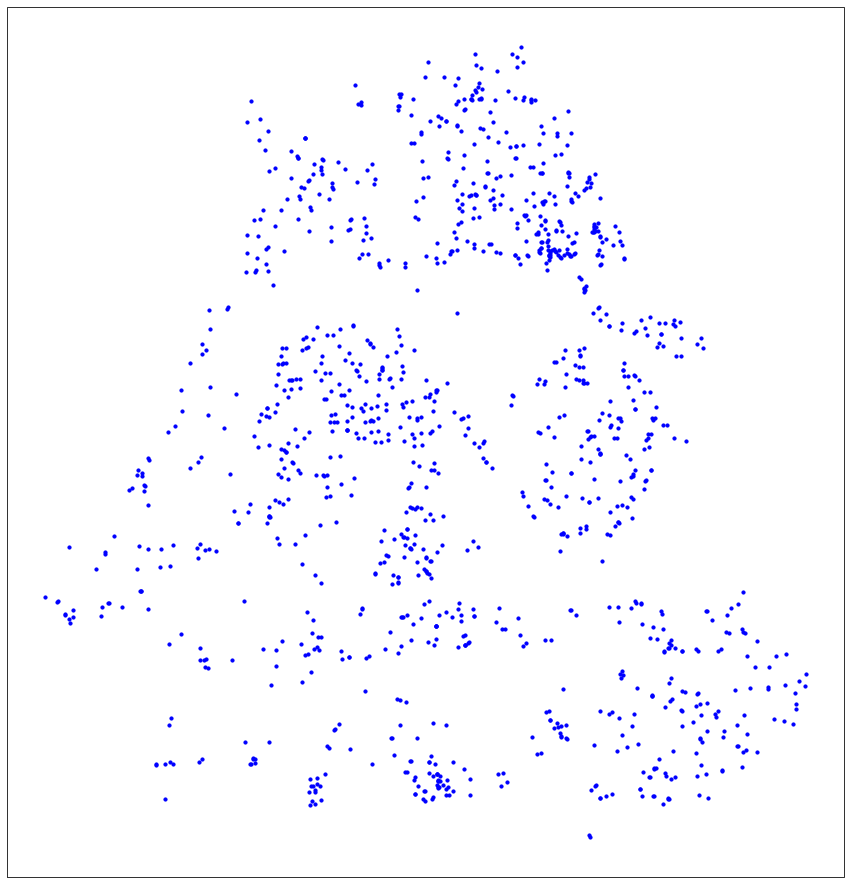

In [ ]:
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(16, 16), subplot_kw=subplot_kw)

# Puntos Floridablanca
lower_lon = -73.13
upper_lon = -73.08
lower_lat = 7.06
upper_lat = 7.10

ax.scatter(df['longitud'], df['latitud'], zorder=10, c='b', s=10)
plt.show()

In [ ]:
#Se carga la cartografía de Melbourne
url = 'https://foscal.net/cartografia/'
#url = 'https://raw.githubusercontent.com/fmoreno4/cd-files/main/'

file_list = ["68276_urbano.cpg", "68276_urbano.dbf", "68276_urbano.prj", "68276_urbano.qmd", "68276_urbano.shp", "68276_urbano.shx"]
#file_list = ["melbourne-metro-region.dbf", "melbourne-metro-region.prj", "melbourne-metro-region.shp", "melbourne-metro-region.shx"]
#file_list = ["UrbanExtent2015_region.dbf", "UrbanExtent2015_region.prj", "UrbanExtent2015_region.shp", "UrbanExtent2015_region.shx"]

for file in file_list:
    urllib.request.urlretrieve(url+file, file)

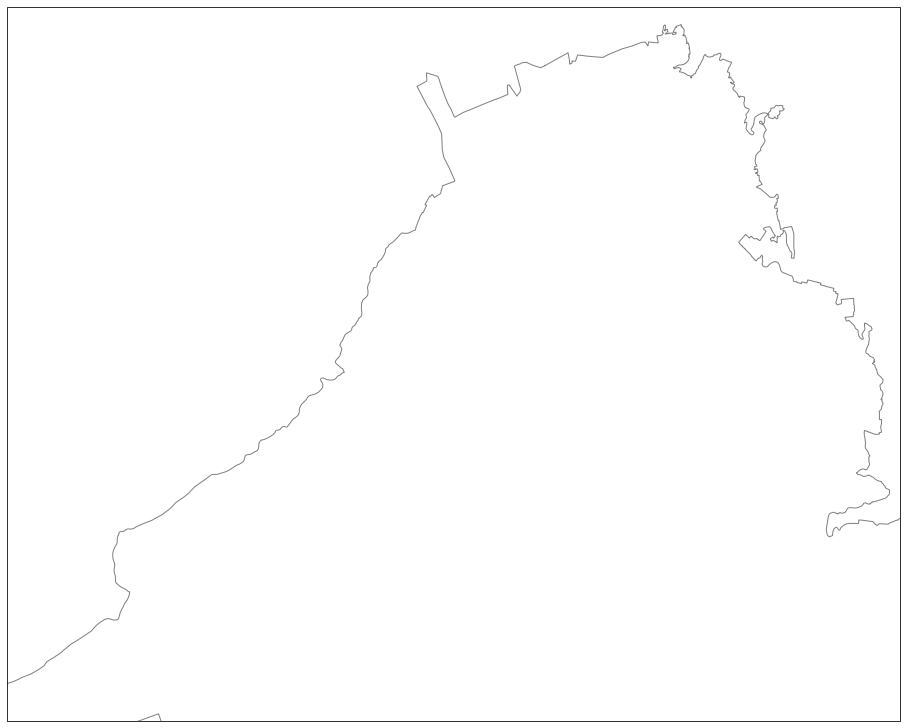

In [ ]:
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(16, 16), subplot_kw=subplot_kw)

# Mapa de Melbourne
lower_lon = -73.13
upper_lon = -73.08
lower_lat = 7.06
upper_lat = 7.10

ax.set_extent([lower_lon, upper_lon, lower_lat, upper_lat])

reader = shapereader.Reader('68276_urbano.shp')

for poli in reader.geometries():
    ax.add_geometries([poli], ccrs.PlateCarree(), facecolor='white', edgecolor='gray')

plt.show()

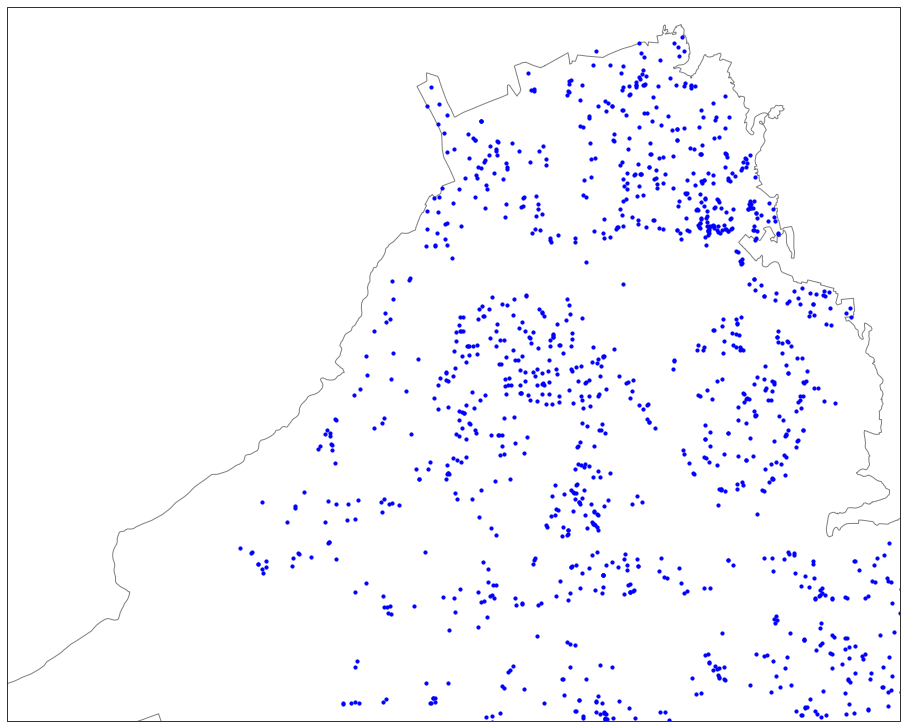

In [ ]:
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(16, 16), subplot_kw=subplot_kw)

# Puntos y mapa de Floridablanca
lower_lon = -73.13
upper_lon = -73.08
lower_lat = 7.06
upper_lat = 7.10

ax.set_extent([lower_lon, upper_lon, lower_lat, upper_lat])

reader = shapereader.Reader('68276_urbano.shp')

for poli in reader.geometries():
    ax.add_geometries([poli], ccrs.PlateCarree(), facecolor='white', edgecolor='gray')

ax.scatter(df['longitud'], df['latitud'], zorder=10, c='b', s=10)

plt.show()

**HALLAR EL AREA DE EL POLIGONO DE FLORIDABLANCA**

In [ ]:
floridablanca = gpd.read_file('68276_urbano.shp')
floridablanca = floridablanca.to_crs(epsg=32618)

area = floridablanca.geometry.area[0]
print("El área del polígono de Floridablanca es:", area, "metros cuadrados")

El área del polígono de Floridablanca es: 17030066.989459652 metros cuadrados


**CONTEO DE PUNTOS**

In [ ]:
# Calcular distancia (x1,y1,x2,y2)
def calcular_distancia(x1, y1, x2, y2):
    distancia = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return distancia

In [ ]:
listaPuntos = []
for i in range(df.shape[0]):
  listaPuntos.append((df['x'][i], df['y'][i]))

In [ ]:
def funcionk(listaPuntos, area, h):
  contK=0
  for i in range(len(listaPuntos)-1):
    for j in range(i+1,len(listaPuntos)):
      if calcular_distancia(listaPuntos[i][0],listaPuntos[i][1],listaPuntos[j][0],listaPuntos[j][1])<=h:
        contK+=1
  valorK=contK*area/len(listaPuntos)**2
  return valorK
  
funcionk(listaPuntos,area,100)

42536.56591433522

In [ ]:
#Se obtienen las  coordenadas limite para generar aleatorios en UTM
x_min, y_min = P(lower_lon, lower_lat)
x_max, y_max = P(upper_lon, upper_lat)
x_min, y_min, x_max, y_max

(706552.7316262802, 780796.0652021945, 712059.2439258386, 785242.8333012793)

In [ ]:
from shapely.geometry import shape
import random

poligono = gpd.read_file('68276_urbano.shp') 
poligono_shapely = shape(poligono.geometry.iloc[0])

def generar_puntos_aleatorios(num_puntos, poligono_shapely):
    puntos = []
    coordenadas=[]
    while len(puntos) < num_puntos:
      
      x=random.uniform(poligono_shapely.bounds[0], poligono_shapely.bounds[2])
      y=random.uniform(poligono_shapely.bounds[1], poligono_shapely.bounds[3])
      punto = Point(x,y)         
      if punto.within(poligono_shapely):
          puntos.append(punto)
          coordenadas.append(P(x,y))
    return puntos,coordenadas
puntos_totales = []
coordenadas_totales=[]
for i in range(9):
    puntos_grupo,coordenadas_grupo = generar_puntos_aleatorios(1262, poligono_shapely)
    puntos_totales.append(puntos_grupo)
    coordenadas_totales.append(coordenadas_grupo)

In [ ]:
df_pruebaGrupo = pd.DataFrame(coordenadas_totales[0], columns=['x','y'])

df_pruebaGrupo['longitud'],df_pruebaGrupo['latitud']=P(df_pruebaGrupo['x'],df_pruebaGrupo['y'],inverse=True)


df_pruebaGrupo

,x,y,longitud,latitud
0,709490.430024,781492.996766,-73.103388,7.066194
1,710249.653617,781137.639094,-73.096530,7.062953
2,712109.978404,780234.664743,-73.079728,7.054720
3,712128.638232,781464.045285,-73.079513,7.065834
4,712505.474357,781110.564549,-73.076116,7.062624
...,...,...,...,...
1257,710601.758749,781590.008862,-73.093327,7.067030
1258,711080.656844,781028.898164,-73.089014,7.061939
1259,711046.393613,781369.043466,-73.089311,7.065015
1260,709811.714475,783959.090003,-73.100389,7.088478


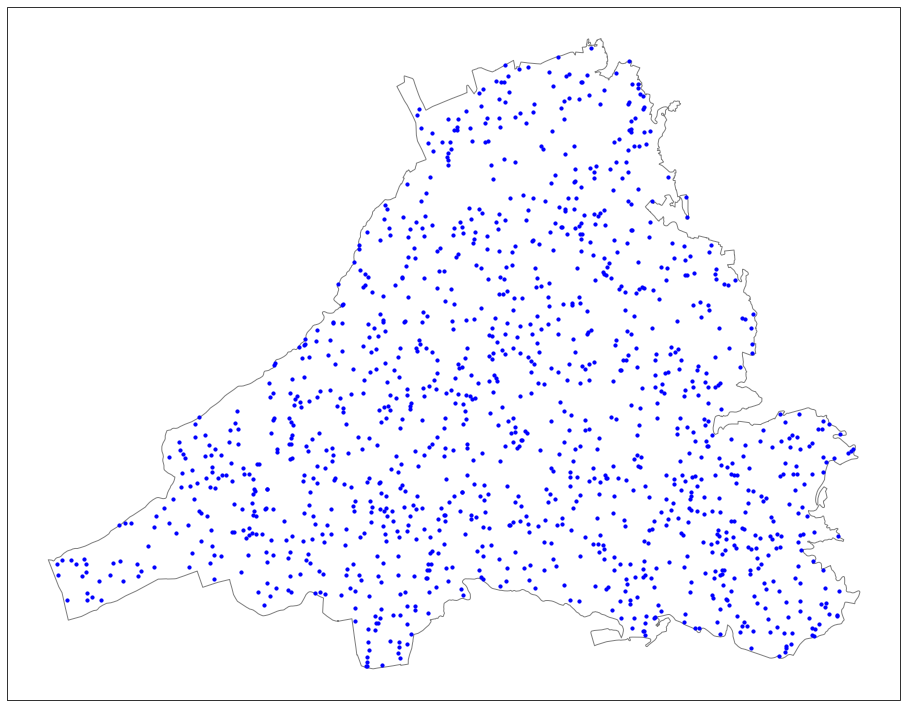

In [ ]:
puntos_totales_gdf = gpd.GeoDataFrame(geometry=puntos_grupo)

fig, ax = plt.subplots(figsize=(16, 16), subplot_kw=subplot_kw)
poligono.plot(ax=ax, facecolor='white', edgecolor='gray')
puntos_totales_gdf.plot(ax=ax, markersize=10, color='blue')
plt.show()

In [ ]:
num_puntos = len(puntos_grupo)
print("El número de puntos aleatorios generados es:", num_puntos)

El número de puntos aleatorios generados es: 1262


In [104]:
lista=[]
grupos=[]
for h in range(10,201,10):
    k = funcionk(listaPuntos,area,h)
    listak=[]
    for group in coordenadas_totales:
        listak.append(funcionk(group,area,h))
    grupos.append(listak)
    listak.append(k)
    listak.sort()

    percentile_2_5 = np.percentile(listak, 2.5)
    percentile_97_5 = np.percentile(listak, 97.5)
    lista.append([h, k,percentile_2_5, percentile_97_5])

In [105]:
print(grupos)

[[117.62247990389326, 128.31543262242903, 139.00838534096476, 171.087243496572, 171.087243496572, 171.087243496572, 171.087243496572, 224.5520070892508, 245.93791252632226, 2127.8975909886144], [534.6476359267875, 556.0335413638591, 556.0335413638591, 556.0335413638591, 588.1123995194663, 673.6560212677523, 673.6560212677523, 748.5066902975025, 759.1996430160383, 4362.724709162587], [1197.6107044760042, 1229.6895626316114, 1293.8472789428258, 1325.9261370984332, 1347.3120425355046, 1347.3120425355046, 1464.934522439398, 1561.1710969062196, 1603.9429077803625, 6950.419267048237], [2341.7566453593295, 2384.5284562334723, 2416.6073143890794, 2427.3002671076156, 2459.3791252632227, 2459.3791252632227, 2566.3086524485802, 2619.773416041259, 2662.545226915402, 10340.085278824072], [3699.7616406133698, 3710.454593331906, 3742.533451487513, 3763.9193569245845, 3828.077073235799, 3860.1559313914063, 3913.620694984085, 4020.5502221694423, 4341.338803725515, 14692.117035268122], [5335.78340654934

In [106]:
# Create a data frame to display the k values for each group
group_columns = ['Grupo {}'.format(i+1) for i in range(len(coordenadas_totales))]
group_columns.append('Grupo Reales')
print(group_columns)

['Grupo 1', 'Grupo 2', 'Grupo 3', 'Grupo 4', 'Grupo 5', 'Grupo 6', 'Grupo 7', 'Grupo 8', 'Grupo 9', 'Grupo Reales']


In [107]:
dfgrupos=pd.DataFrame(grupos, columns=group_columns)
indices = [f'K{i}' for i in range(10, 201,10)]
dfgrupos = dfgrupos.set_index(pd.Index(indices))
dfgrupos

,Grupo 1,Grupo 2,Grupo 3,Grupo 4,Grupo 5,Grupo 6,Grupo 7,Grupo 8,Grupo 9,Grupo Reales
K10,117.622480,128.315433,139.008385,171.087243,171.087243,171.087243,171.087243,224.552007,245.937913,2127.897591
K20,534.647636,556.033541,556.033541,556.033541,588.112400,673.656021,673.656021,748.506690,759.199643,4362.724709
K30,1197.610704,1229.689563,1293.847279,1325.926137,1347.312043,1347.312043,1464.934522,1561.171097,1603.942908,6950.419267
K40,2341.756645,2384.528456,2416.607314,2427.300267,2459.379125,2459.379125,2566.308652,2619.773416,2662.545227,10340.085279
K50,3699.761641,3710.454593,3742.533451,3763.919357,3828.077073,3860.155931,3913.620695,4020.550222,4341.338804,14692.117035
K60,5335.783407,5346.476359,5410.634076,5474.791792,5517.563603,5538.949508,5613.800177,5816.966279,6223.298482,19407.709184
K70,7346.058518,7431.602139,7452.988045,7452.988045,7591.996430,7645.461194,7784.469579,7859.320248,8019.714539,24861.115071
K80,9506.034967,9580.885636,9655.736305,9869.595359,9987.217839,9987.217839,10008.603745,10083.454414,10168.998035,30474.915248
K90,11933.335234,11986.799997,12147.194288,12425.211059,12425.211059,12478.675823,12564.219444,12585.605350,12735.306688,36163.566094
K100,14649.345224,14799.046562,15012.905617,15087.756286,15269.536482,15355.080104,15387.158962,15590.325064,15740.026402,42536.565914


In [ ]:
dfresultados=pd.DataFrame(lista,columns=('D','k','percentile_2_5', 'percentile_97_5'))
dfresultados

,D,k,percentile_2_5,percentile_97_5
0,10,2127.897591,120.028394,1704.456663
1,20,4362.724709,539.459465,3551.931569
2,30,6950.419267,1204.828448,5747.462086
3,40,10340.085279,2351.380303,8612.638767
4,50,14692.117035,3702.167555,12363.191933
5,60,19407.709184,5338.189321,16441.216776
6,70,24861.115071,7365.305833,21071.799951
7,80,30474.915248,9522.876367,25906.083875
8,90,36163.566094,11945.364806,30892.207728
9,100,42536.565914,14683.028025,36507.344524


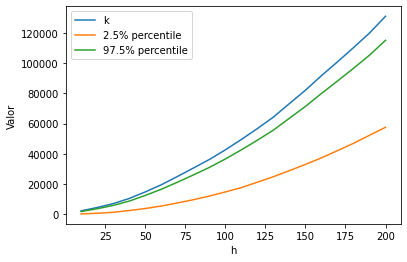

In [ ]:
dfinal = pd.DataFrame(lista, columns=['h', 'k', 'percentile_2_5', 'percentile_97_5'])

# Creamos la visualización
plt.plot(dfinal['h'], dfinal['k'], label='k')
plt.plot(dfinal['h'], dfinal['percentile_2_5'], label='2.5% percentile')
plt.plot(dfinal['h'], dfinal['percentile_97_5'], label='97.5% percentile')
plt.xlabel('h')
plt.ylabel('Valor')
plt.legend()
plt.show()